In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Generación de datos


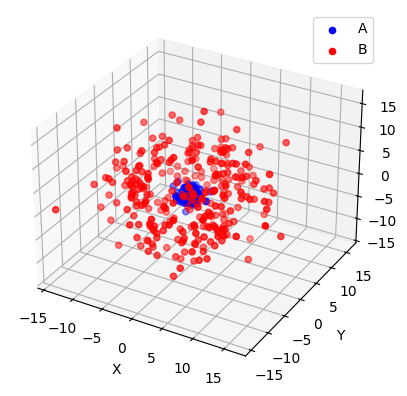

In [2]:
# Generación de datos
A = np.random.normal(scale=1, size=(100, 3))
B = np.array([x for x in np.random.normal(scale=5, size=(500, 3)) if np.linalg.norm(x) > 7])

# Crear figura y eje 3D correctamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Forma correcta de definir un eje 3D en matplotlib

# Extraer coordenadas correctamente
ax.scatter(A[:, 0], A[:, 1], A[:, 2], label='A', color='b')
ax.scatter(B[:, 0], B[:, 1], B[:, 2], label='B', color='r')

# Etiquetas de ejes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Mostrar leyenda y gráfico
ax.legend()
plt.show()

A continuación implementamos un PCA y un t-SNE para reducir la dimensionalidad de los datos y visualizarlos en 2D.

### PCA

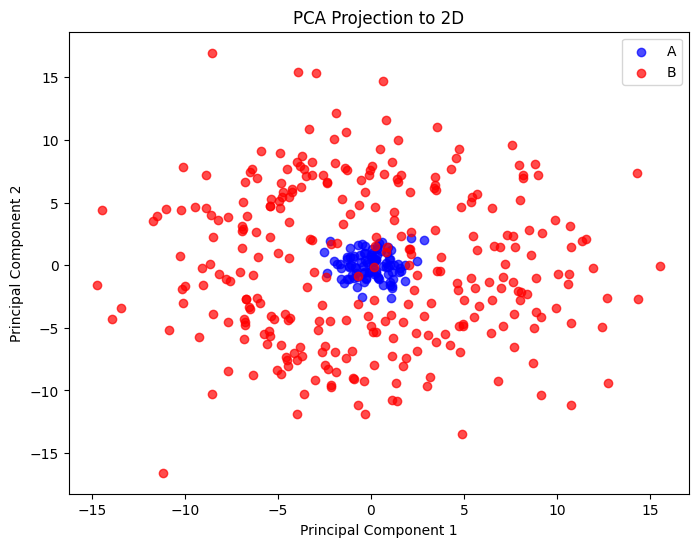

In [3]:
# Aplicar PCA para reducir a 2D
pca = PCA(n_components=2)
A_pca = pca.fit_transform(A)
B_pca = pca.transform(B)

# Visualización en 2D
plt.figure(figsize=(8, 6))
plt.scatter(A_pca[:, 0], A_pca[:, 1], label='A', color='b', alpha=0.7)
plt.scatter(B_pca[:, 0], B_pca[:, 1], label='B', color='r', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("PCA Projection to 2D")
plt.show()

### t-SNE

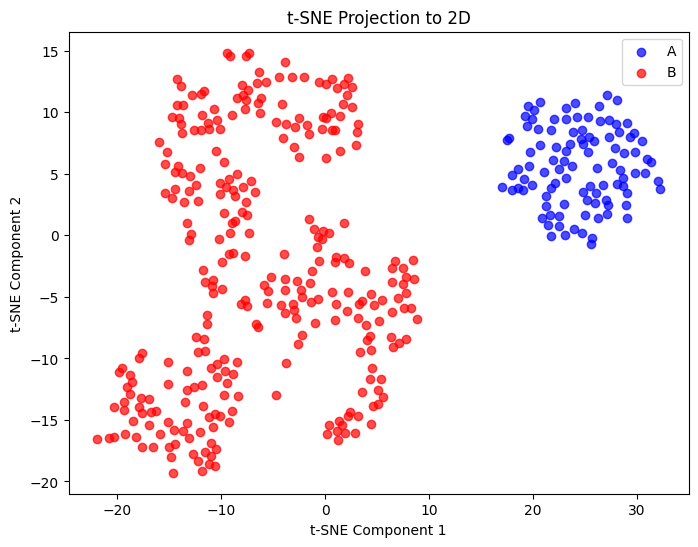

In [4]:
# Concatenar A y B para aplicar t-SNE conjuntamente
X = np.vstack((A, B))

# Aplicar t-SNE para reducir a 2D
X_2D = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

# Separar los datos transformados en A y B
A_2D = X_2D[:A.shape[0], :]
B_2D = X_2D[A.shape[0]:, :]

# Visualización en 2D
plt.figure(figsize=(8, 6))
plt.scatter(A_2D[:, 0], A_2D[:, 1], label='A', color='b', alpha=0.7)
plt.scatter(B_2D[:, 0], B_2D[:, 1], label='B', color='r', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.title("t-SNE Projection to 2D")
plt.show()